#EDA on Spotify

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Load Data 

In [ ]:
musical_features_path = '/content/gdrive/My Drive/Spotify/combined_mus_feat.csv'  #change dir to your project folder
playlist_path = '/content/gdrive/My Drive/Spotify/playlist_info.csv'  #change dir to your project folder


df_musical_features = pd.read_csv(musical_features_path, sep=' ')
df_musical_features.rename(columns={'uri':'track_uri'}, inplace=True)
df_playlist_features = pd.read_csv(playlist_path, sep=' ')

##Column names and Shapes

In [ ]:
print(f'column_names of musical_features: {df_musical_features.columns}')
print(f'column_names of playlist_features: {df_playlist_features.columns}')

# df_musical_features['type'][0:5]

column_names of musical_features: Index(['Unnamed: 0', 'Unnamed', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'acousticness', 'analysis_url', 'artists',
       'danceability', 'duration_ms', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'track_uri', 'valence', 'year'],
      dtype='object')
column_names of playlist_features: Index(['Unnamed: 0', 'track_uri', 'track_name', 'album_name', 'album_uri',
       'artist_name', 'artist_uri', 'duration_ms'],
      dtype='object')


In [ ]:
print(f'shape of musical_features: {df_musical_features.shape}')
print(f'shape of playlist_features: {df_playlist_features.shape}')


shape of musical_features: (406857, 29)
shape of playlist_features: (406916, 8)


# Merging the dataframes via Inner Join operation keeping only the required columns from playlist dataframe.

In [ ]:
columns = ['track_uri', 'track_name', 'artist_name']
req_col_df = df_playlist_features[columns]
df = pd.merge(req_col_df, df_musical_features, how='inner', on='track_uri')
df.head()

,track_uri,track_name,artist_name,Unnamed: 0,Unnamed,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,acousticness,analysis_url,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,time_signature,track_href,type,valence,year
0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,Beyoncé,27996,NaN,27998.0,27999,27999,0.00238,https://api.spotify.com/v1/audio-analysis/0WqI...,"['6vWDO969PvNqNYHIOW5v0m', '3nFkdlSjzX9mRTtwJO...",0.664,235933,0.758,NaN,0WqIKmW4BTrj3eJFmnCKMv,0.000000,2,0.0598,-6.583,0,Crazy In Love (feat. Jay-Z),24.0,NaN,0.2100,99.259,4.0,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,audio_features,0.701,2003.0
1,spotify:track:1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,Shaggy,93198,NaN,93212.0,93221,93221,0.05610,https://api.spotify.com/v1/audio-analysis/1lzr...,"['5EvFsr3kj42KNv97ZEnqij', '67wCYxOq4A1ohAs7jW...",0.853,227600,0.606,NaN,1lzr43nnXAijIGYnCT8M8H,0.000000,0,0.3130,-4.596,1,It Wasn't Me,1.0,NaN,0.0713,94.759,4.0,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,audio_features,0.654,2000.0
2,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Yeah!,Usher,28550,NaN,28552.0,28554,28554,0.02120,https://api.spotify.com/v1/audio-analysis/0XUf...,"['23zg3TcAtWQy7J6upgbUnj', '7sfl4Xt5KmfyDs2T3S...",0.881,250373,0.788,NaN,0XUfyU2QviPAs6bxSpXYG4,0.000000,2,0.0377,-4.669,1,Yeah!,0.0,NaN,0.1680,104.997,4.0,https://api.spotify.com/v1/tracks/0XUfyU2QviPA...,audio_features,0.592,2004.0
3,spotify:track:2gam98EZKrF9XuOkU13ApN,Promiscuous,Nelly Furtado,141100,NaN,141119.0,141121,39393,0.05690,https://api.spotify.com/v1/audio-analysis/2gam...,"['2jw70GZXlAI8QzWeY2bgRc', '5Y5TRrQiqgUO4S36tz...",0.808,242293,0.970,NaN,2gam98EZKrF9XuOkU13ApN,0.000061,10,0.1540,-6.098,0,Promiscuous,81.0,NaN,0.0506,114.328,4.0,https://api.spotify.com/v1/tracks/2gam98EZKrF9...,audio_features,0.868,2006.0
4,spotify:track:4Y45aqo9QMa57rDsAJv40A,Right Where You Want Me - Radio Edit Version,Jesse McCartney,238008,238034.0,NaN,238038,34586,0.00206,https://api.spotify.com/v1/audio-analysis/4Y45...,['2Hjj68yyUPiC0HKEOigcEp'],0.710,211693,0.553,NaN,4Y45aqo9QMa57rDsAJv40A,0.000055,4,0.0469,-4.722,0,Right Where You Want Me - Radio Edit Version,0.0,NaN,0.0292,99.005,4.0,https://api.spotify.com/v1/tracks/4Y45aqo9QMa5...,audio_features,0.731,2006.0


#EDA on musical features

In [ ]:
musical_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                           'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'year']
df[musical_columns].head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
0,24.0,0.00238,0.664,235933,0.758,0.000000,2,0.0598,-6.583,0,0.2100,99.259,0.701,2003.0
1,1.0,0.05610,0.853,227600,0.606,0.000000,0,0.3130,-4.596,1,0.0713,94.759,0.654,2000.0
2,0.0,0.02120,0.881,250373,0.788,0.000000,2,0.0377,-4.669,1,0.1680,104.997,0.592,2004.0
3,81.0,0.05690,0.808,242293,0.970,0.000061,10,0.1540,-6.098,0,0.0506,114.328,0.868,2006.0
4,0.0,0.00206,0.710,211693,0.553,0.000055,4,0.0469,-4.722,0,0.0292,99.005,0.731,2006.0


##More Information about the musical_features

* **ACCOUSTICNESS** - A confidence measure from 0.0 to 1.0 of whether track is accoustic in the sense that 1.0 representing high confidence that the track is accoustic.

* **DANCEABILITY** - Danceability describes how suitable a track is for dancing on a combination of musical elements including tempo, rhythm stability, beat strength and overall regularity. A value of 0.0 is at least danceable and 1.0 is most danceable.

* **ENERGY** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For e.g, death metal has a higher energy, while Bach prelude scores low on scale. Perceptual features contributiong to the attribute include dynamic range, perceived loudness, timbre, onset rate and general entropy.


* **INSTRUMENTALNESS** - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instruments in this context. Rap or spoken word tracks are clearly "vocal". The closer the insrtumentalness is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **LIVENESS** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **LOUDNESS** - The overall loudness of a track is measured in decibels(dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is primary psychological correlate of physical strength(amplitude). Values typically range between -60 and 0 db. 

* **SPEECHINESS** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording(e.g talk show , audio book, poetry), the closer to attribute value. Values above 0.66 describe tracks that re probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases are rap music. Values below 0.33 most likely represent music and other non speech-like tracks.

* **VALENCE** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound are more positive(e.g happy, cheerful, euphoric) while tracks with low valence sounds are more negative (e.g sad, depressed, angry)

* **TEMPO** - The overall estimated tempo of a track in beats per minute (BPM), in musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **KEY** - The estimated overall key of the track . Integers map to pitches using standard pitch-class-notation. E.g- 0=C, 1=C#/D, 2=D etc. If no key was detected, the value is -1.

* **MODE** - Mode indicates the modality( major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor by 0.



## Information about Non-null Counts and Datatype of each attribute column is tabulated below.

In [ ]:
df_musical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406857 entries, 0 to 406856
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        406857 non-null  int64  
 1   Unnamed           203429 non-null  float64
 2   Unnamed: 0.1      203428 non-null  float64
 3   Unnamed: 0.1.1    406857 non-null  int64  
 4   Unnamed: 0.1.1.1  406857 non-null  int64  
 5   acousticness      406857 non-null  float64
 6   analysis_url      365354 non-null  object 
 7   artists           406857 non-null  object 
 8   danceability      406857 non-null  float64
 9   duration_ms       406857 non-null  int64  
 10  energy            406857 non-null  float64
 11  explicit          41503 non-null   float64
 12  id                406857 non-null  object 
 13  instrumentalness  406857 non-null  float64
 14  key               406857 non-null  int64  
 15  liveness          406857 non-null  float64
 16  loudness          40

##Tabulating Basic Statistical Details of the features.

In [ ]:
df_musical_features.describe()

,Unnamed: 0,Unnamed,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,year
count,406857.000000,203429.000000,203428.000000,406857.000000,406857.000000,406857.000000,406857.000000,4.068570e+05,406857.000000,41503.000000,406857.000000,406857.000000,406857.000000,406857.000000,406857.000000,406857.000000,406857.000000,406857.000000,365354.000000,406857.000000,406857.000000
mean,203428.000000,305175.923379,101726.203630,203451.313007,50861.687957,0.308913,0.563183,2.407725e+05,0.611503,0.135677,0.155762,5.258214,0.205286,-8.681556,0.657423,19.343946,0.090392,120.618958,3.900524,0.472463,2007.639013
std,117449.643573,58731.204762,58731.727324,117462.118033,29365.745225,0.331238,0.176337,1.174006e+05,0.250321,0.342449,0.304241,3.570474,0.183172,4.997173,0.474572,18.133418,0.111782,29.546476,0.428638,0.258577,11.226181
min,0.000000,203451.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.056000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1885.000000
25%,101714.000000,254314.000000,50862.750000,101729.000000,25430.000000,0.019800,0.448000,1.900270e+05,0.441000,0.000000,0.000000,2.000000,0.096000,-10.556000,0.000000,0.000000,0.035000,97.485000,4.000000,0.259000,2005.000000
50%,203428.000000,305177.000000,101728.500000,203451.000000,50862.000000,0.160000,0.575000,2.251760e+05,0.650000,0.000000,0.000086,5.000000,0.128000,-7.396000,1.000000,17.000000,0.047300,120.034000,4.000000,0.459000,2012.000000
75%,305142.000000,356037.000000,152590.250000,305177.000000,76293.000000,0.574000,0.693000,2.700000e+05,0.819000,0.000000,0.067900,8.000000,0.259000,-5.372000,1.000000,33.000000,0.088600,139.732000,4.000000,0.679000,2015.000000
max,406856.000000,406901.000000,203450.000000,406901.000000,101727.000000,0.996000,0.991000,5.495365e+06,1.000000,1.000000,1.000000,11.000000,1.000000,4.764000,1.000000,90.000000,0.967000,249.703000,5.000000,1.000000,2020.000000


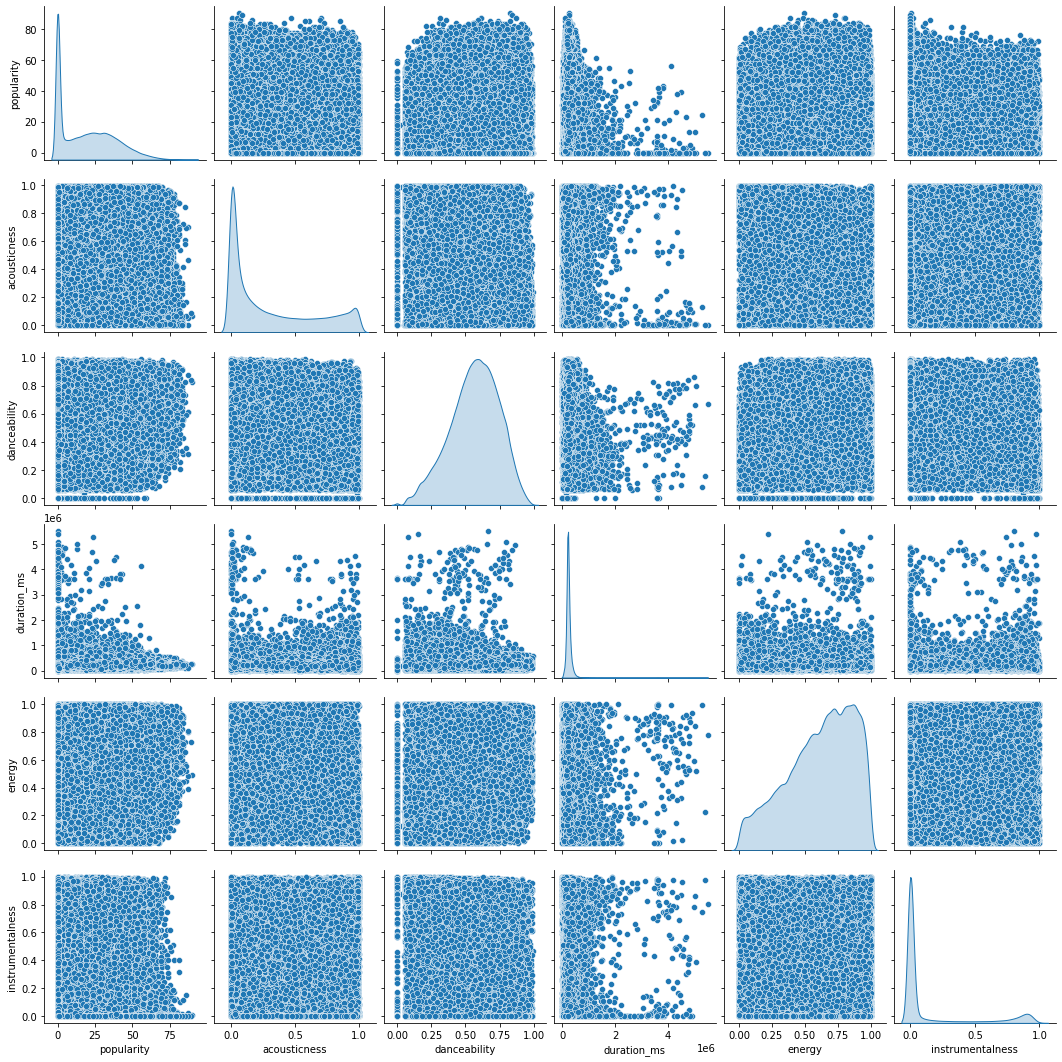

In [ ]:
# df_musical_features = df_musical_features.sample(n=10000)
sc_plot1 = sns.pairplot(df_musical_features[['popularity', 'acousticness', 'danceability', 'duration_ms', 
                           'energy', 'instrumentalness']], diag_kind='kde')

* The diagonal plots are the marginal distributions corresponding to the row/column name of the diagonal.
* The off-diagonal plots correspond to scatter plots with correpsonding 'x_coords' and 'y_ccords' as shown below or leftmost axes of each of those plots (also called density estimation). These also give a rough estimate of the joint probabilities.
* For e.g, instrumentalness range = [0.2, 0.6] intersect duration_ms range = [2, 4] have almost 0 density i.e sparser. This gives an idea about the correlation not necessarily causation.
* Although, these plots give an actual idea about the density and to some extent the correlations, we need to some other visualization tools like Coefficient matrix to quantify a measure of how the features are correlated (pairwise).

## Sampling 10000 random songs and plotting the pairwise plots.

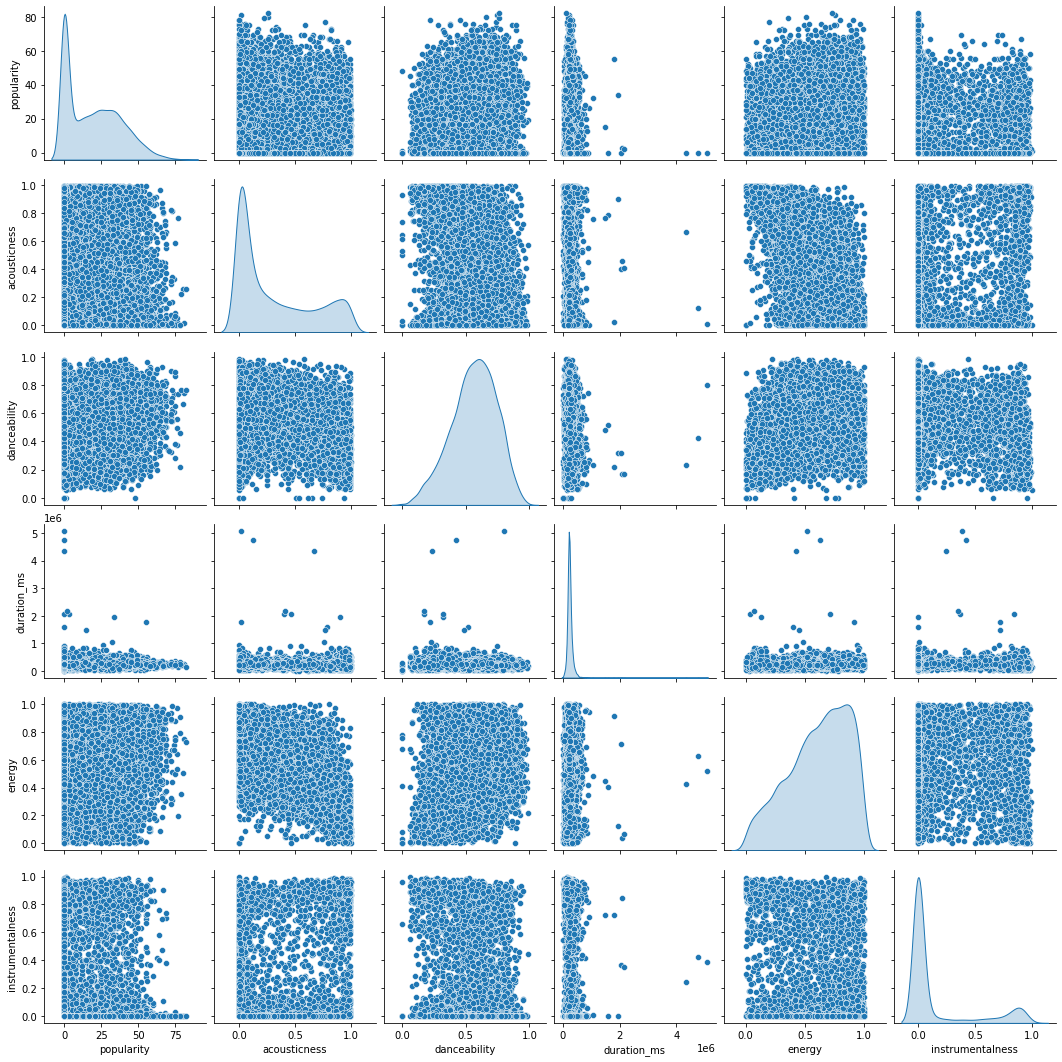

In [ ]:
df_musical_features_sampled = df_musical_features.sample(n=10000)
sc_plot1 = sns.pairplot(df_musical_features_sampled[['popularity', 'acousticness', 'danceability', 'duration_ms', 
                           'energy', 'instrumentalness']], diag_kind='kde')

## Estimating correlations among the musical_features by visualizing correlation matrix after computing Pearson's correlation coefficient.


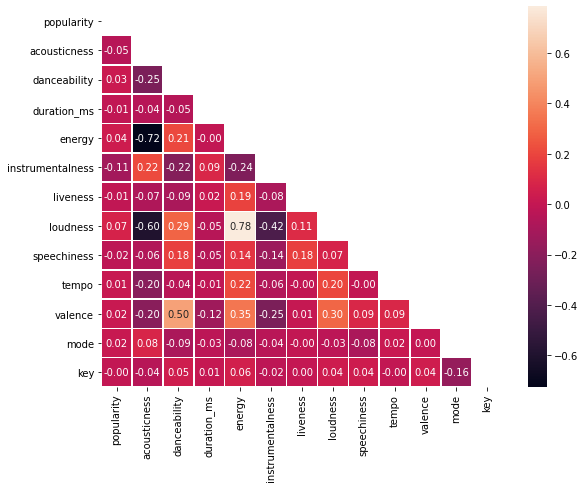

In [ ]:
'estimate correlations in matrix form with annotation bar'
numeric=['popularity', 'acousticness', 'danceability', 
        'duration_ms', 'energy', 'instrumentalness', 
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'key']

corr_matrix = df_musical_features[numeric].corr()
mask = np.zeros_like(corr_matrix)
traingle_indices = np.triu_indices_from(corr_matrix)
mask[traingle_indices] = True
y, x = plt.subplots(figsize=(9, 7))

heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={'size':10},  fmt=".2f", linewidths=.5 )
plt.show()

***Observations*** :
* We note that there's +ve correlation between energy and loudness from which we can infer that high 'energy' correlate to high 'loudness' with the caveat that both of these features take continuous values (also called numerical features) as the default correlation metric used here is Pearson coefficient.
* We also find that there's -ve correlation between 'energy' and 'acousticness' i.e  high energy values generally correlate to low acoustiness-values with the above mentioned caveat.
* ***Note***:- the correlation entry-values corresponding to rows and columns  'mode' and 'key' features donot imply anything as these are discrete valued features (also called categorical valued features). 

* We further analyse this correlation by plotting the jointplots between them. 

Text(1, 1.2, 'Energy-acousticness relation')

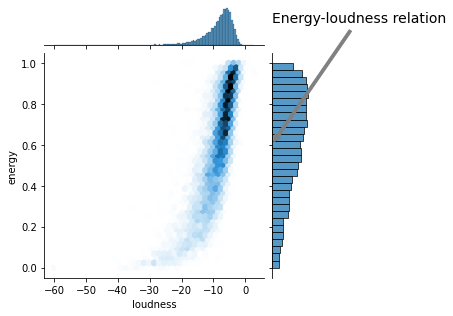

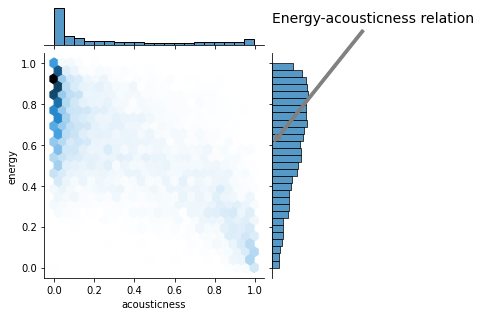

In [ ]:
# plot for energy-loudness pair 
sns.jointplot(x="loudness", y="energy", data=df_musical_features, kind="hex", height=4.5)

plt.annotate('Energy-loudness relation',
            xy=[0.1, 0.6],
            xytext=[1, 1.2],
            fontsize=14,
            arrowprops=dict(color='grey',
                            arrowstyle='simple',
                            shrinkA=4,
                            shrinkB=4))

# plot for energy-acousticness pair 
sns.jointplot(x="acousticness", y="energy", data=df_musical_features, kind="hex", height=4.5)


plt.annotate('Energy-acousticness relation',
            xy=[0.1, 0.6],
            xytext=[1, 1.2],
            fontsize=14,
            arrowprops=dict(color='grey',
                            arrowstyle='simple',
                            shrinkA=4,
                            shrinkB=4))

***Observations*** :
* We note that there's +ve correlation between energy and loudness from the jointplots strengthening our conclusion deduced from Pearson coefficient correlation metric.
* We also find that there's -ve correlation between 'energy' and 'acousticness' i.e  high energy values generally correlate to low acoustiness-values.

# Gaining more insights by analysing through visualization.

## Distribution of different musical features in the dataset.

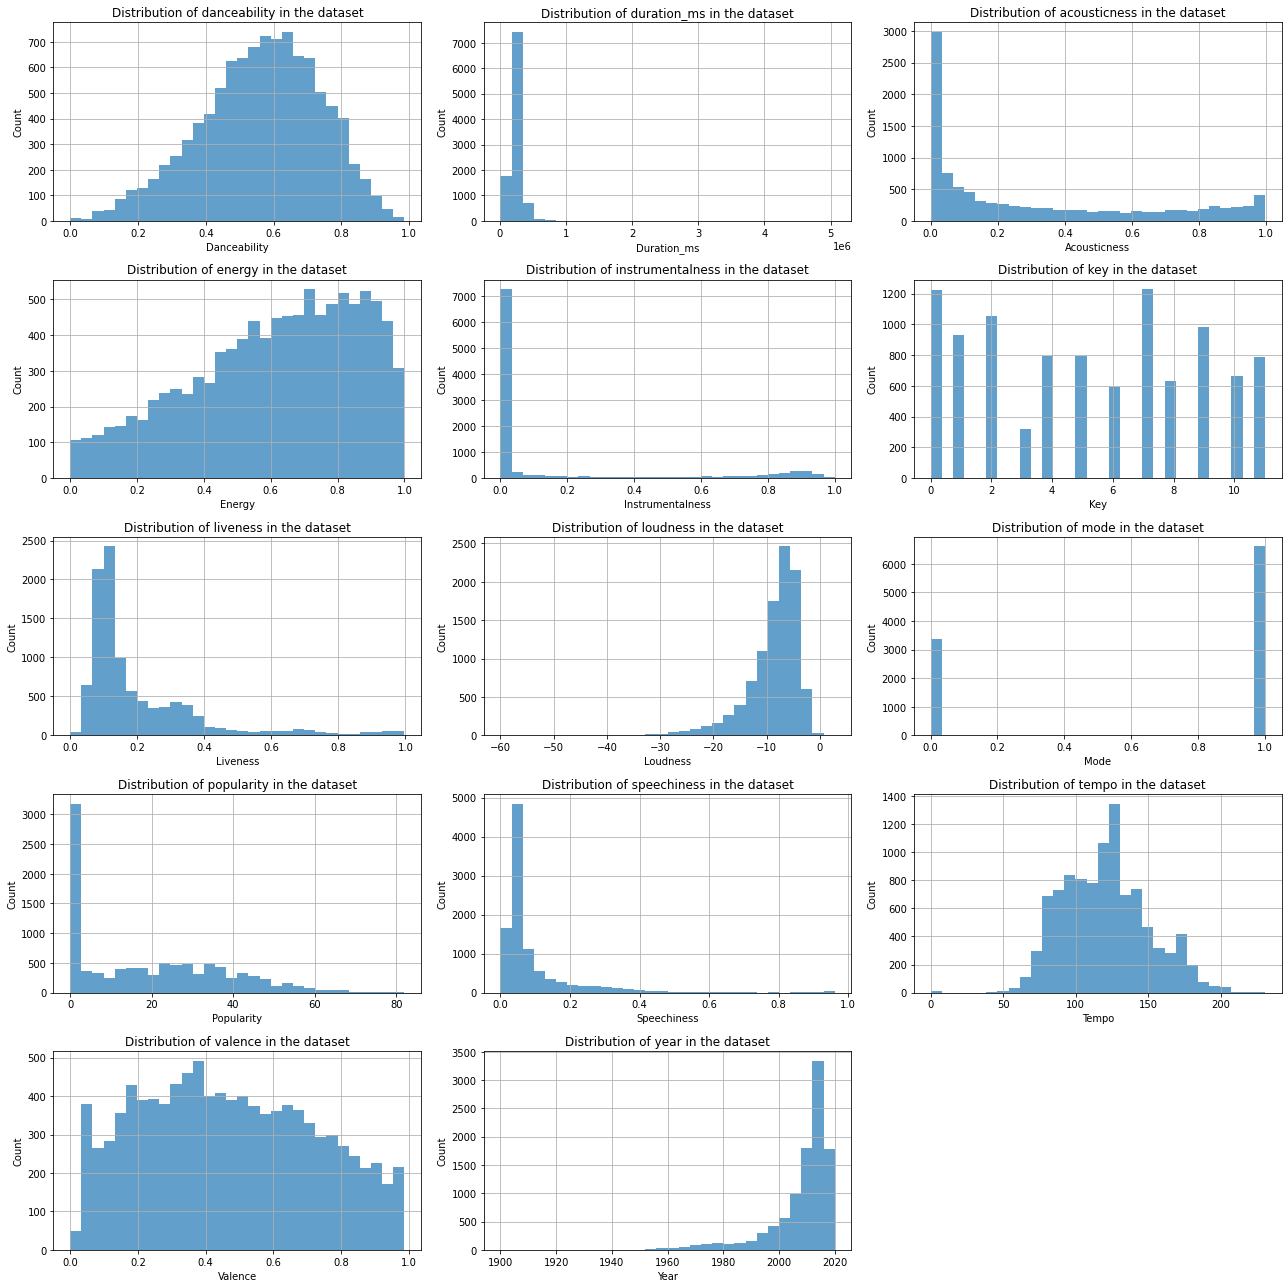

In [ ]:
def plot_grid(col_name, i, len):
  tempo_np = df_musical_features[col_name]
  ax5 = fig5.add_subplot(5,3,i)
  ax5.set_xlabel(f'{col_name.capitalize()}')
  ax5.set_ylabel('Count')
  ax5.set_title(f'Distribution of {col_name} in the dataset')
  tempo_np.hist(alpha=0.7, bins=30)
  if i == len:
    plt.tight_layout()

fig5 = plt.figure(figsize = (18,18))
col_name = ['danceability', 'duration_ms', 'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']
for i in range(len(col_name)):
  plot_grid(col_name=col_name[i], i=(i+1), len = len(col_name))

**Observations**

*   Distribution of danceability in the dataset is almost normal(slightly left skewed) with X ~ N(0.56313, 0.176377). 
*   There are a majority of songs with acousticness values close to 0 (needn't be left-skewed).
*   There are a majority of songs with instrumentalness values close to 0, making it highly left-skewed.
*   There are a majority of songs with speechiness and liveness values close to 0.1, making them highly left-skewed.
*   There's a much higher concentration of popular songs than unpopular songs.
*   Valence is the most uniformly distributed feature of the lot.
*   Larger proportion of data(songs) belong to Year 2000-'20.
*   'Tempo' has an almost Normal Distribution with X ~ N(120, 29).



## Plots throwing light on mood based recommendation
* Could be instrumental in modeling mood-based Music Recommendation Systems.

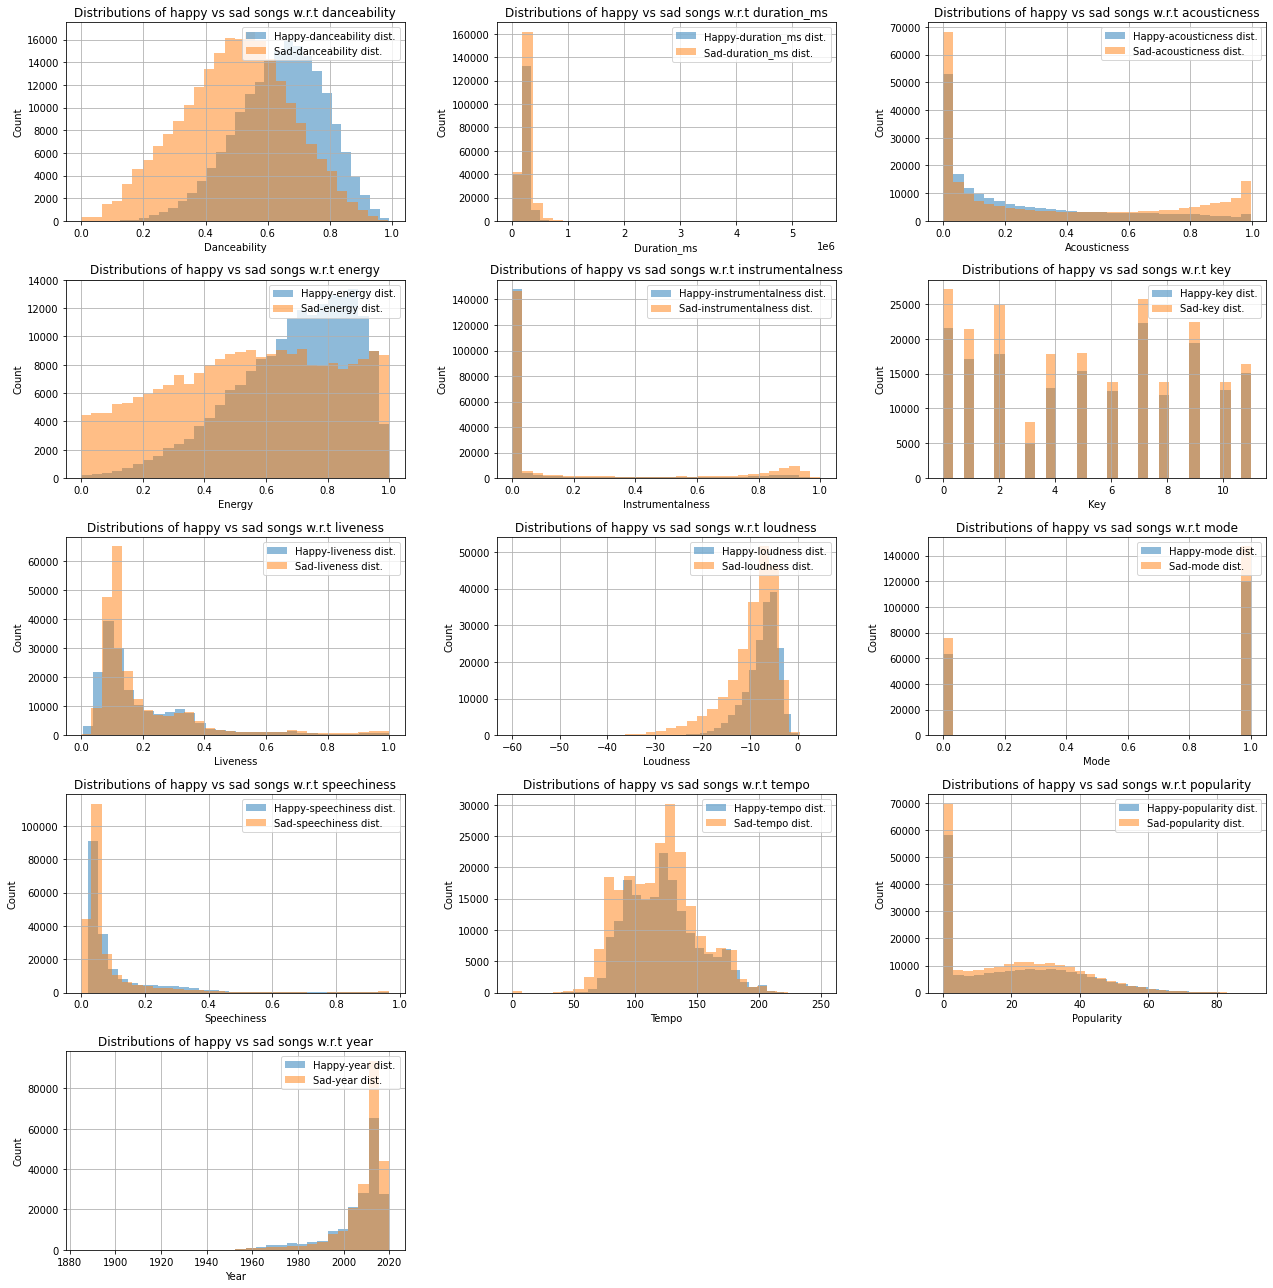

In [ ]:
def plot_grid(col_name, i, len ):
  happy = df_musical_features[df_musical_features[ 'valence'] > 0.5][col_name]
  sad = df_musical_features[df_musical_features[ 'valence'] <= 0.5][col_name]

  ax5 = fig6.add_subplot(5,3,i)
  ax5.set_xlabel(f'{col_name.capitalize()}')
  ax5.set_ylabel('Count')
  ax5.set_title(f'Distributions of happy vs sad songs w.r.t {col_name}')
  happy.hist(alpha=0.5, bins=30, label=f'Happy-{col_name} dist.')
  sad.hist(alpha=0.5, bins=30, label=f'Sad-{col_name} dist.')
  plt.legend(loc='upper right')
  if i == len:
    plt.tight_layout()


fig6 = plt.figure(figsize = (18,18))
col_name = ['danceability', 'duration_ms', 'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'popularity', 'year']
for i in range(len(col_name)):
  plot_grid(col_name=col_name[i], i=i+1, len = len(col_name))

**Observations**


*   Particularly for danceability feature, a significant proportion of sad and happy songs correspond to low danceability values and high danceability values respectively which is intuitive. In other words, given a sad song( low valence valued) with valence < 0.5, there's a high probablity of it being a sad song is higher than it being happy. Similarly, a high-valence-valued song is more probable of being associated with 'happy' mood.
*   No concrete argument can be made for songs with (valence>0.5) , but songs towards the other end are more likely to be 'sad/not-happy' songs.
* Songs with extreme 'acousticness' values are more likely to be sad ones, it's almost equally likely otherwise.
* Songs which have lesser 'loudness' values have a higher chance of being sad.
* Slow paced songs more likely to be sad than happy.



##More insights drawn from visualization pertaining to 'popularity'
* Could be instrumental in modeling popularity-based Music Recommendation Systems.

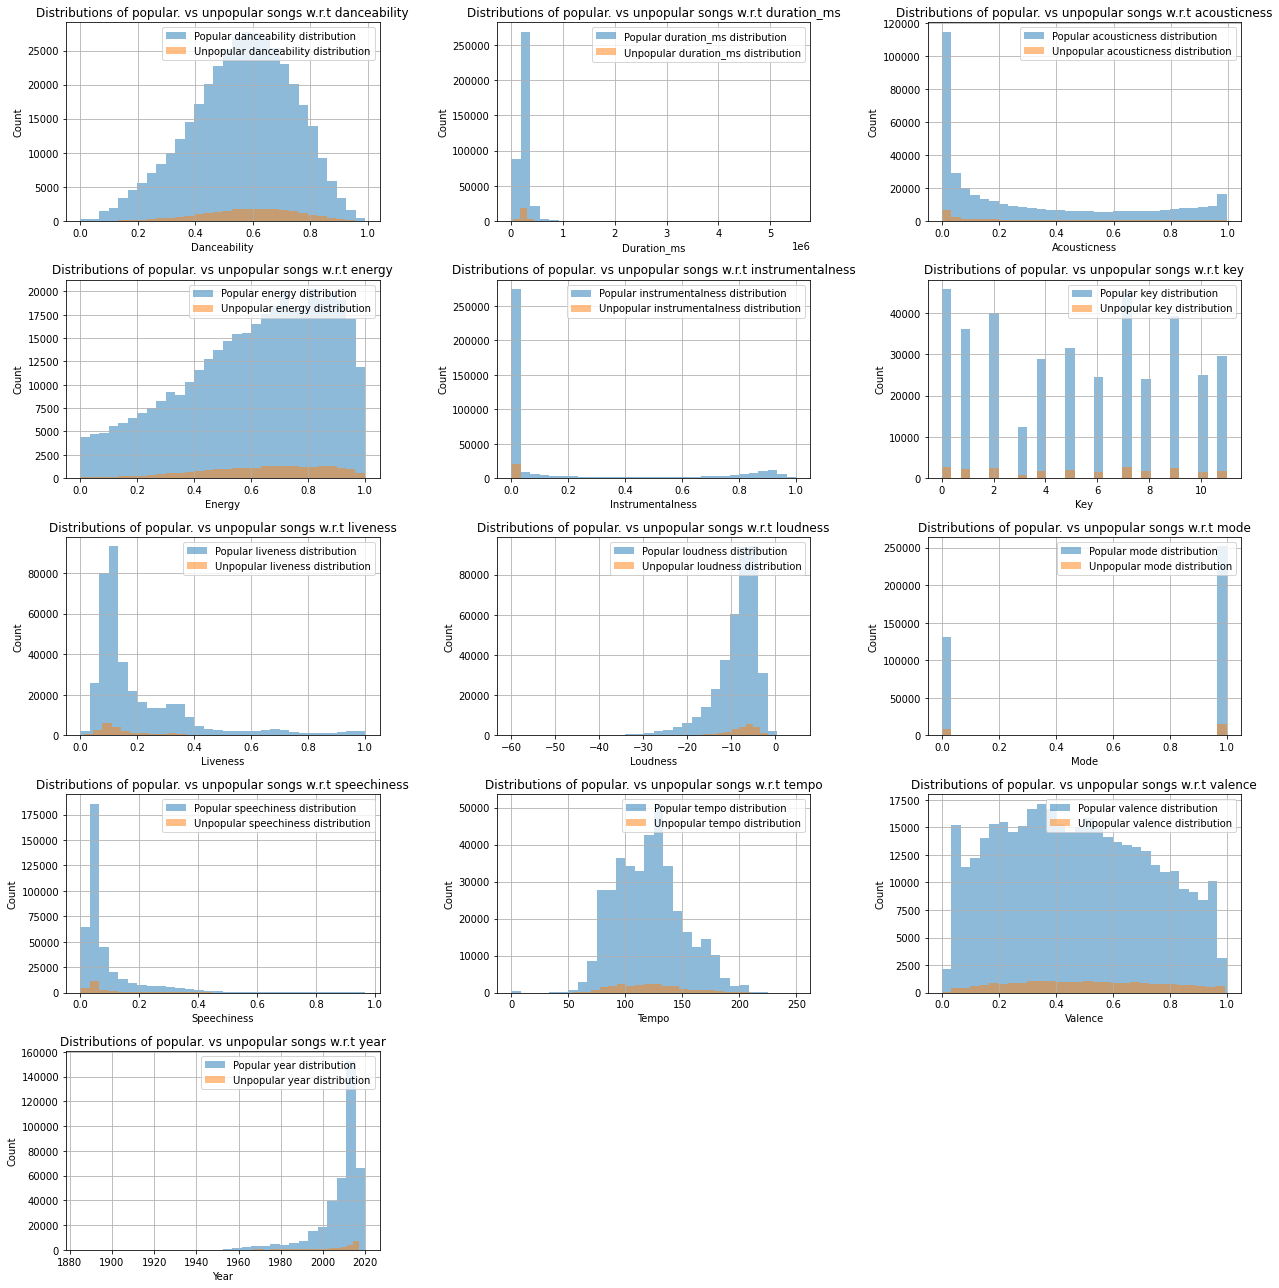

In [ ]:
# pop >= 50 and pop < 50
# Less_popular = df_musical_features[df_musical_features[ 'popularity'] <= 50][col_name]
# More_popular = df_musical_features[df_musical_features[ 'popularity'] > 50][col_name]


def plot_grid(col_name, i, len ):
  Popular = df_musical_features[df_musical_features[ 'popularity'] <= 50][col_name]
  Unpopular = df_musical_features[df_musical_features[ 'popularity'] > 50][col_name]

  ax5 = fig6.add_subplot(5,3,i)
  ax5.set_xlabel(f'{col_name.capitalize()}')
  ax5.set_ylabel('Count')
  ax5.set_title(f'Distributions of popular. vs unpopular songs w.r.t {col_name}')
  Popular.hist(alpha=0.5, bins=30, label=f'Popular {col_name} distribution')
  Unpopular.hist(alpha=0.5, bins=30, label=f'Unpopular {col_name} distribution')
  plt.legend(loc='upper right')
  if i == len:
    plt.tight_layout()


fig6 = plt.figure(figsize = (18,18))
col_name = ['danceability', 'duration_ms', 'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'year']
for i in range(len(col_name)):
  plot_grid(col_name=col_name[i], i=i+1, len = len(col_name))

**Observations**


1.   A general observation corresponding to all the above 13 plots is the dataset has a much higher collection of 'popular' songs than 'unpopular' songs which is expected as unpopular songs tend to be inaccessible (generally) 'untrue for songs that are new and unpopular.
2.  No conclusive or likelihood statements can be made due to large disparity/discrepancy between number of popular and unpopular songs in the dataset.

